# Predicting Heart disease using Machine Learning

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay # Import RocCurveDisplay instead of plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [ ]:
# View of the Renamed Dataframe
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df1 = df.copy()                               # Create copy of DataFrame
df1['ST_depression'] = df1['ST_depression'].astype(int)         # Transform float to integer
print(df1)

     Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0     63    1           3                     145          233   
1     37    1           2                     130          250   
2     41    0           1                     130          204   
3     56    1           1                     120          236   
4     57    0           0                     120          354   
..   ...  ...         ...                     ...          ...   
298   57    0           0                     140          241   
299   45    1           3                     110          264   
300   68    1           0                     144          193   
301   57    1           0                     130          131   
302   57    0           1                     130          236   

     Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                      1            0                 150   
1                      0            1                 187   
2                      0

In [ ]:
df=df1

In [ ]:
list(df.columns.values)

['Age',
 'Sex',
 'Chest_pain',
 'Resting_blood_pressure',
 'Cholesterol',
 'Fasting_blood_sugar',
 'ECG_results',
 'Maximum_heart_rate',
 'Exercise_induced_angina',
 'ST_depression',
 'ST_slope',
 'Major_vessels',
 'Thalassemia_types',
 'Heart_disease']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      303 non-null    int64
 1   Sex                      303 non-null    int64
 2   Chest_pain               303 non-null    int64
 3   Resting_blood_pressure   303 non-null    int64
 4   Cholesterol              303 non-null    int64
 5   Fasting_blood_sugar      303 non-null    int64
 6   ECG_results              303 non-null    int64
 7   Maximum_heart_rate       303 non-null    int64
 8   Exercise_induced_angina  303 non-null    int64
 9   ST_depression            303 non-null    int64
 10  ST_slope                 303 non-null    int64
 11  Major_vessels            303 non-null    int64
 12  Thalassemia_types        303 non-null    int64
 13  Heart_disease            303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [ ]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
Chest_pain,0
Resting_blood_pressure,0
Cholesterol,0
Fasting_blood_sugar,0
ECG_results,0
Maximum_heart_rate,0
Exercise_induced_angina,0
ST_depression,0


In [ ]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.178396,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.089604,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.180783,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.190276,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.035479,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.022088,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.055906,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.327627,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.271144,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.178396,0.089604,-0.180783,0.190276,0.035479,0.022088,-0.055906,-0.327627,0.271144,1.000000,-0.555175,0.232167,0.198263,-0.423572


In [ ]:
df['Heart_disease'].value_counts()

,count
Heart_disease,
1,165
0,138


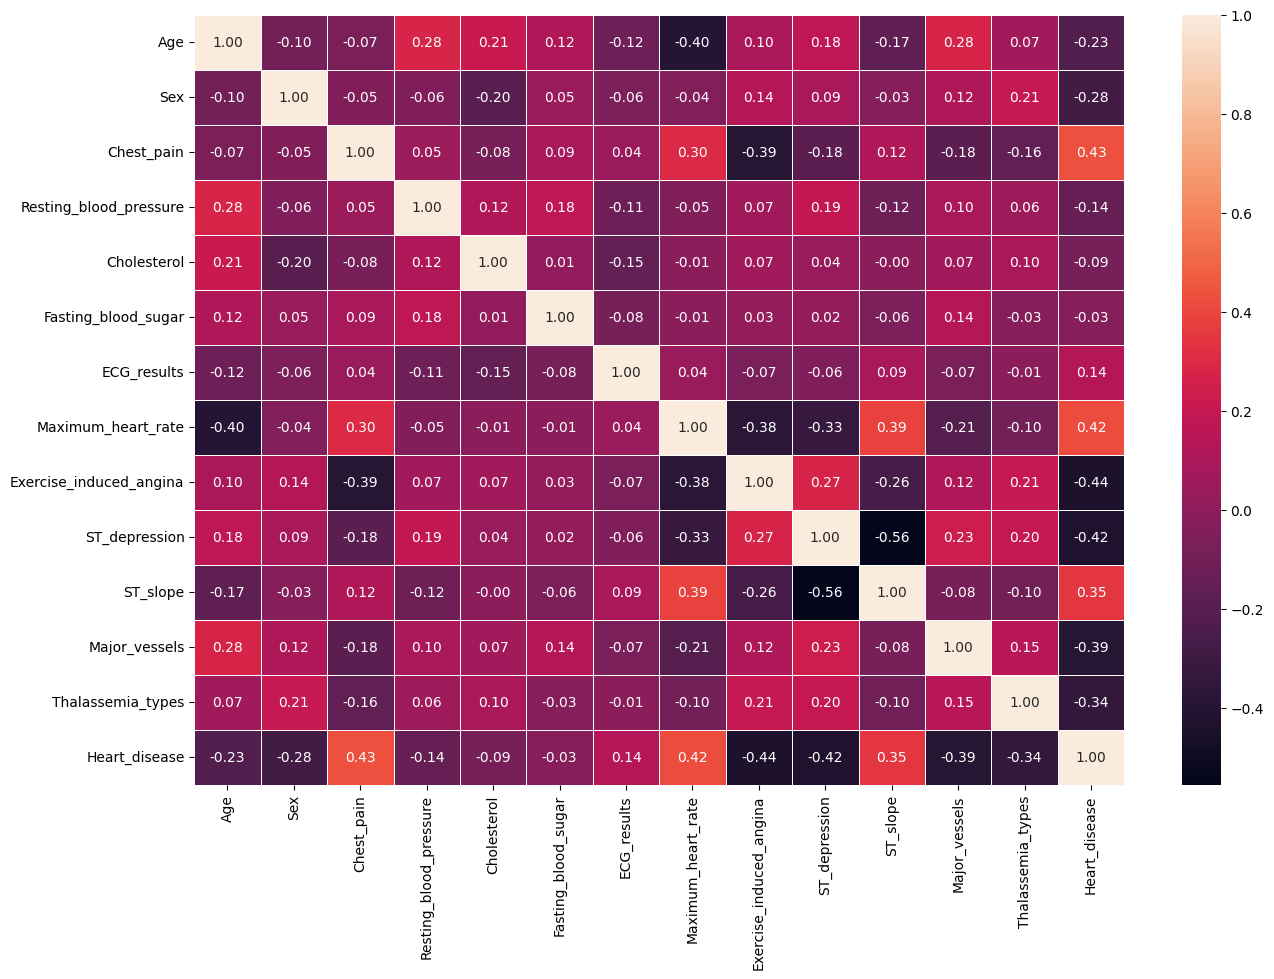

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
X=df.drop(['Heart_disease'],axis=1)
y=df['Heart_disease']


In [ ]:
print(X)

     Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0     63    1           3                     145          233   
1     37    1           2                     130          250   
2     41    0           1                     130          204   
3     56    1           1                     120          236   
4     57    0           0                     120          354   
..   ...  ...         ...                     ...          ...   
298   57    0           0                     140          241   
299   45    1           3                     110          264   
300   68    1           0                     144          193   
301   57    1           0                     130          131   
302   57    0           1                     130          236   

     Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                      1            0                 150   
1                      0            1                 187   
2                      0

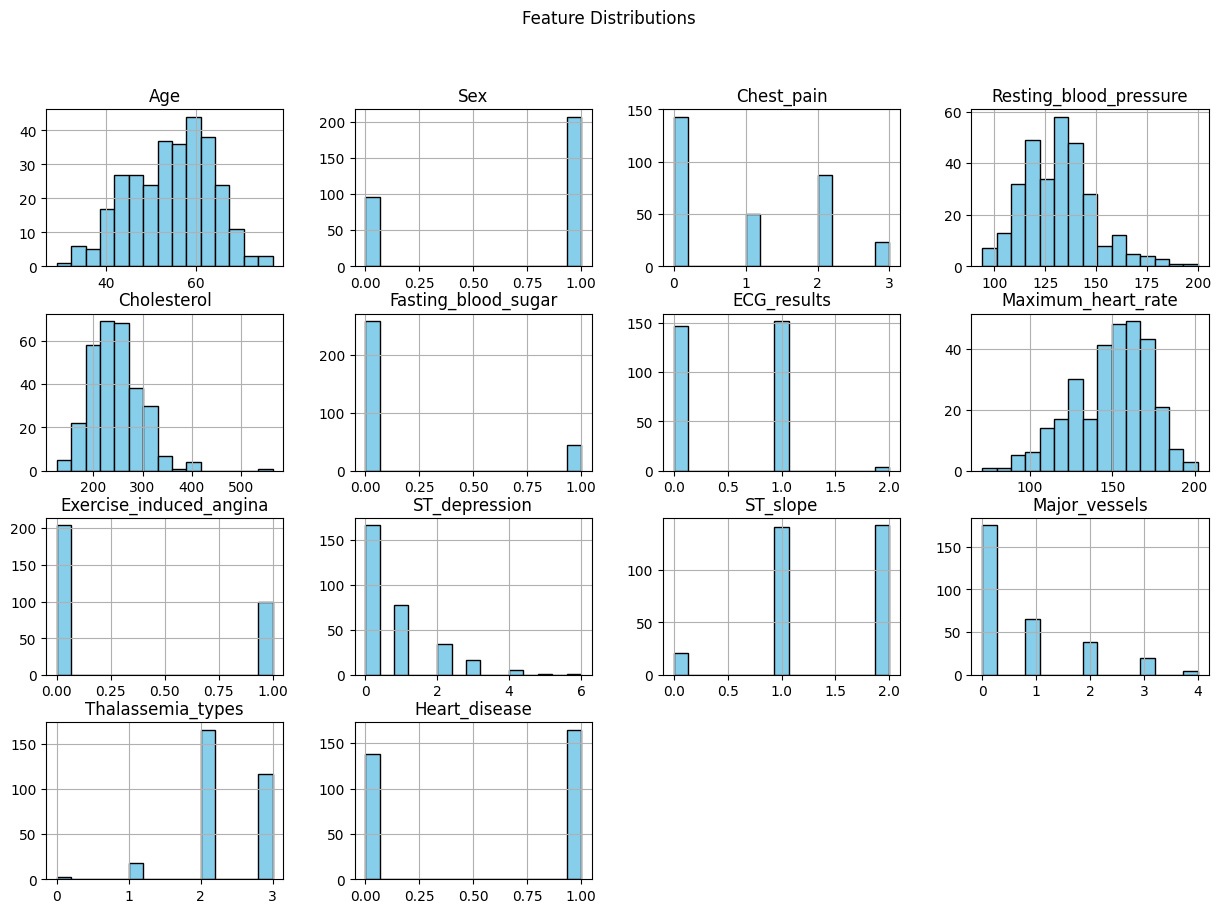

In [ ]:

# Histograms for feature distributions
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


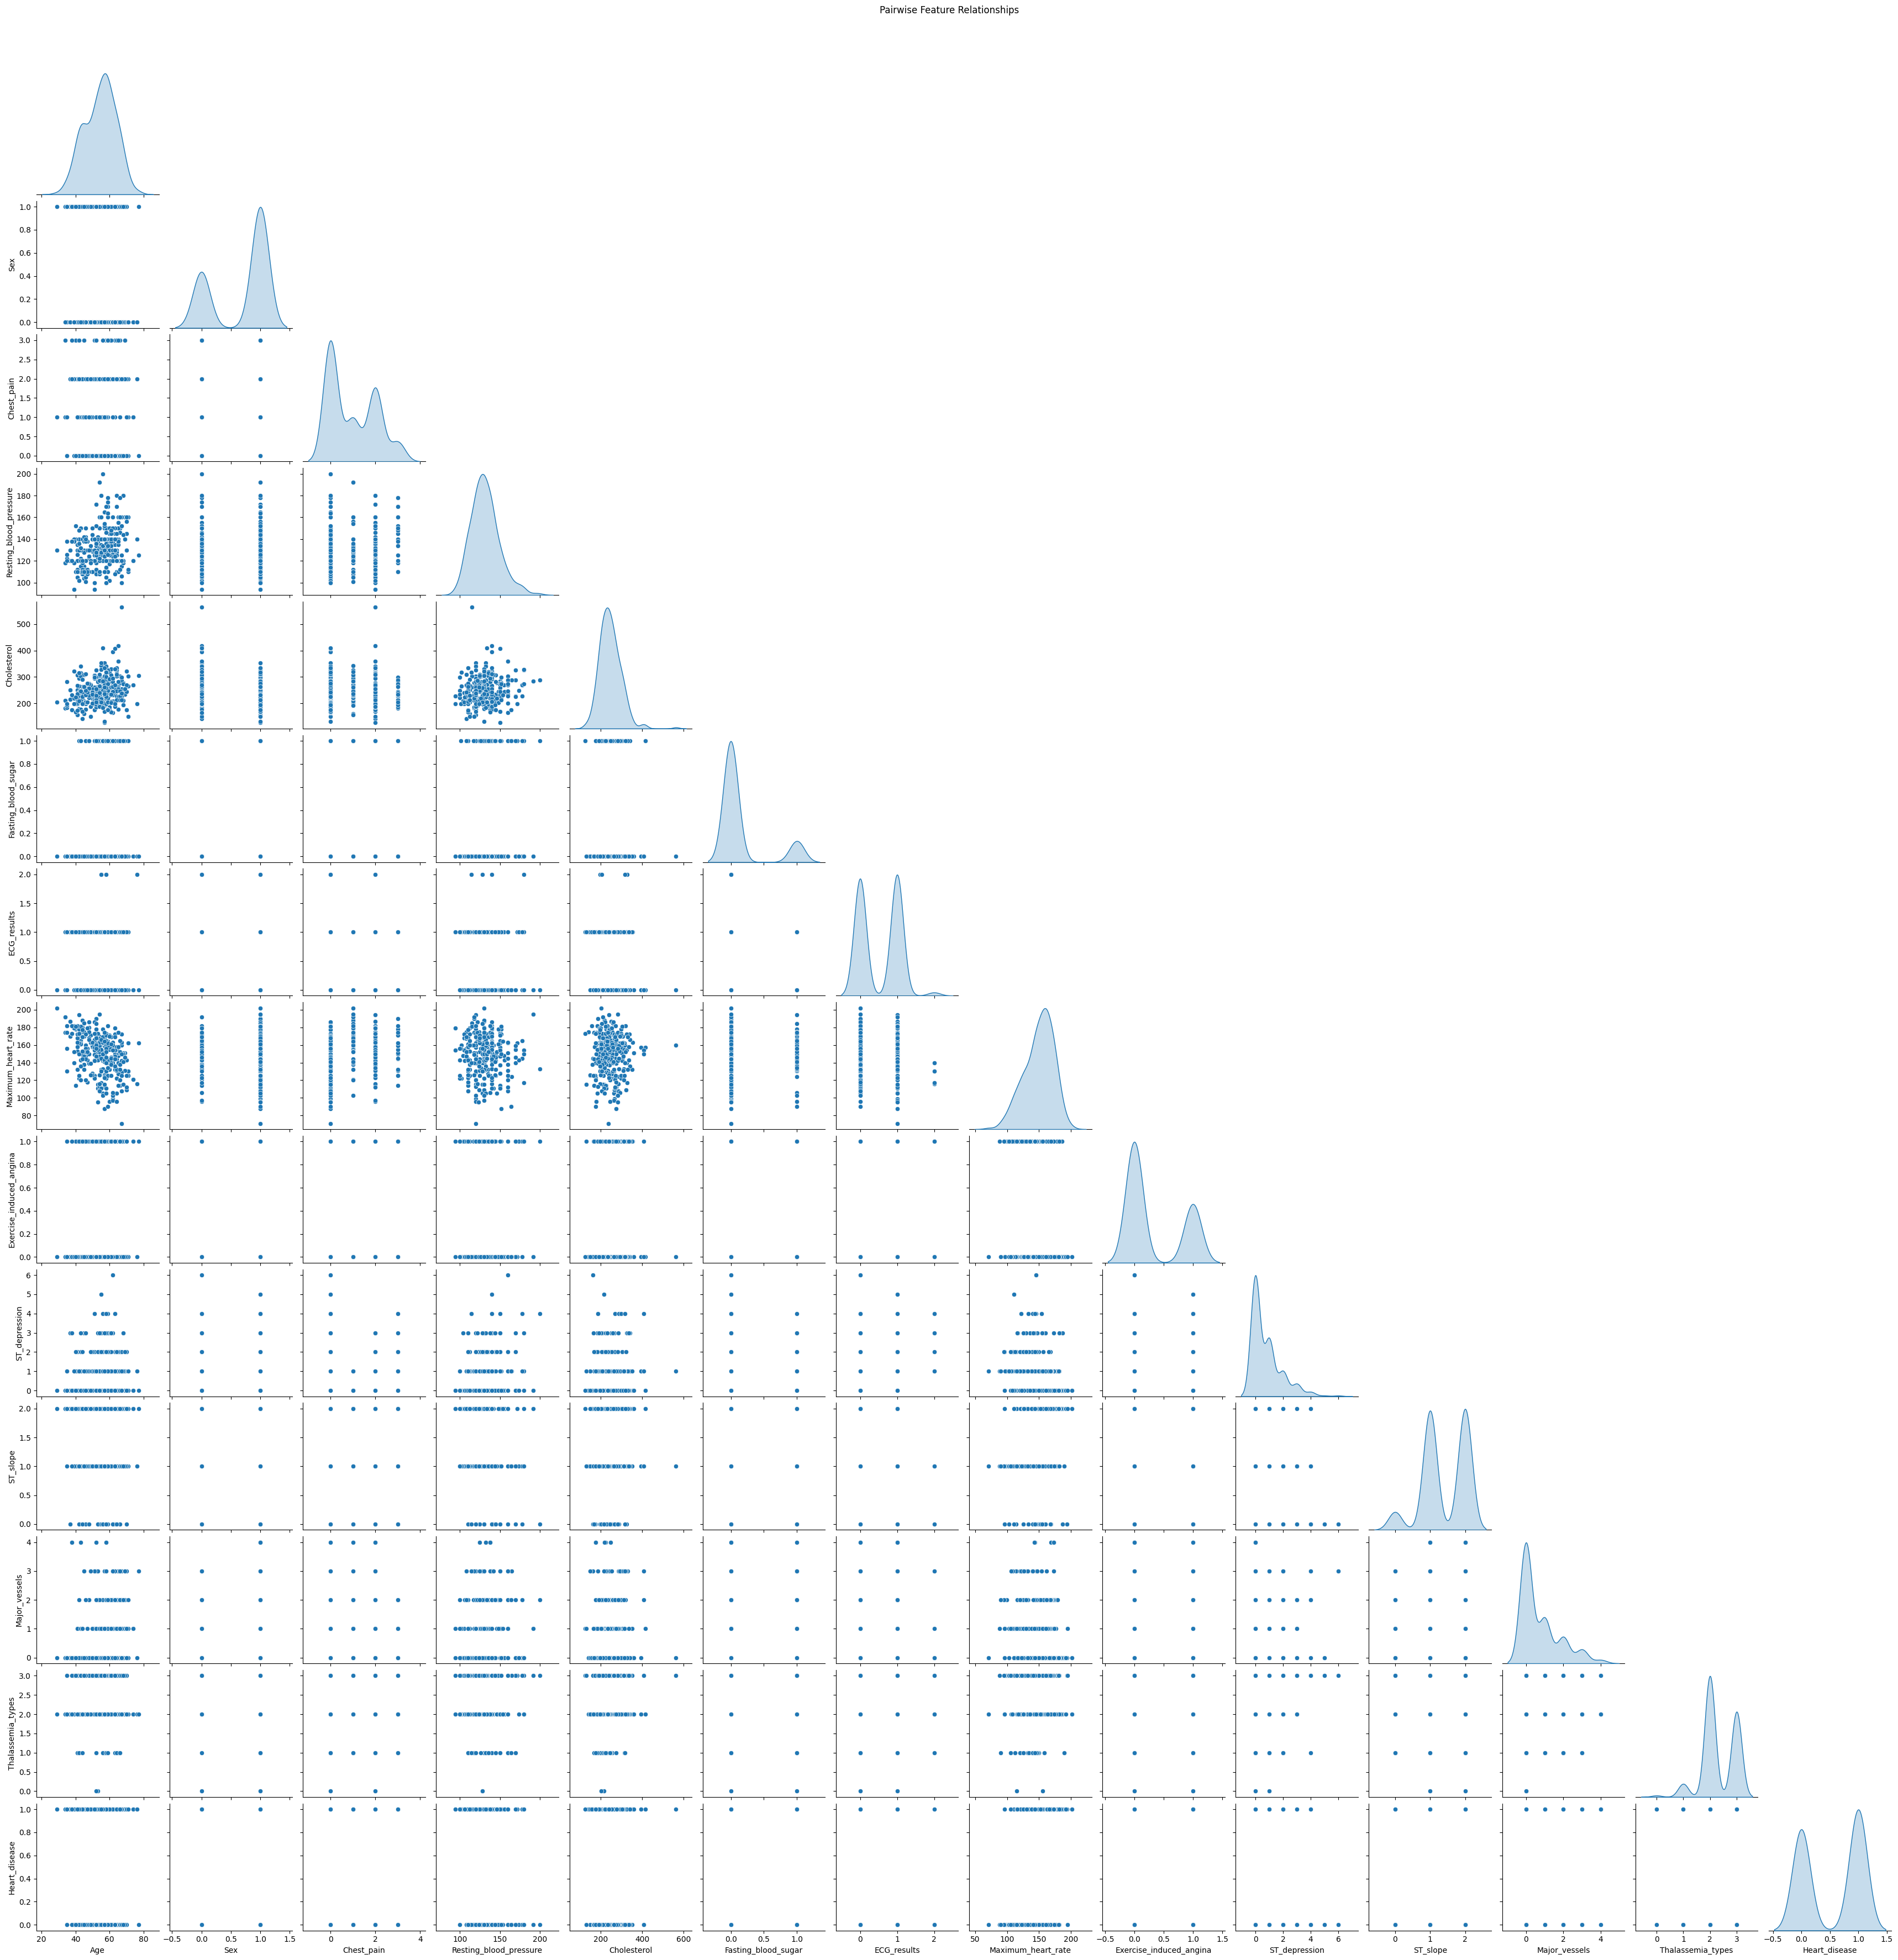

In [ ]:

# Pair plot for pairwise relationships
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


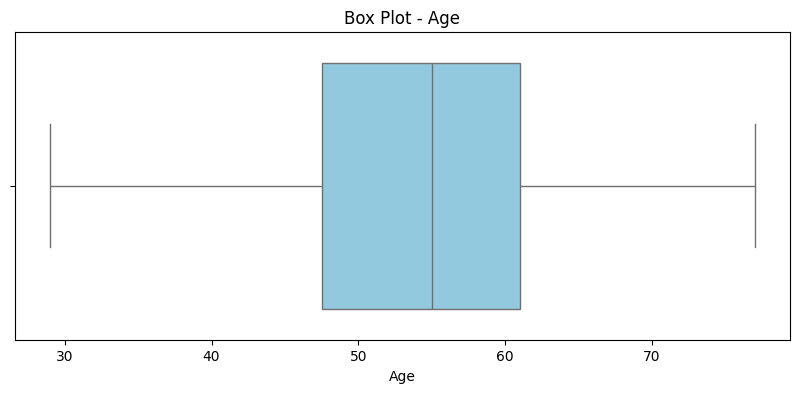

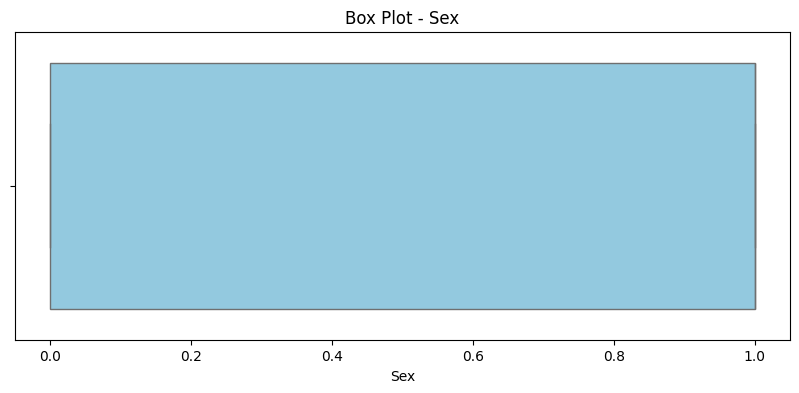

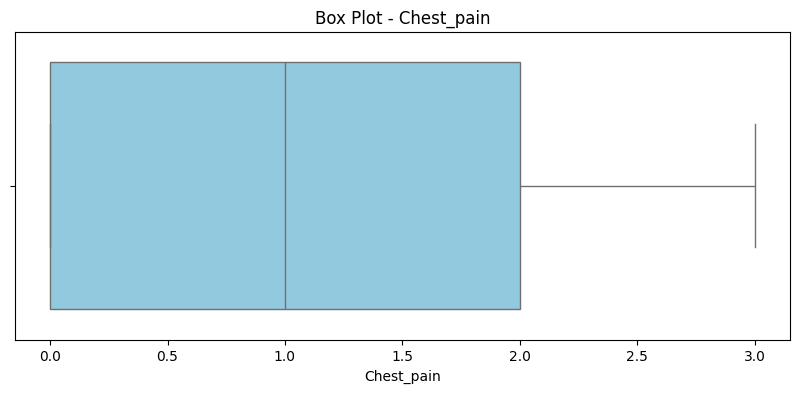

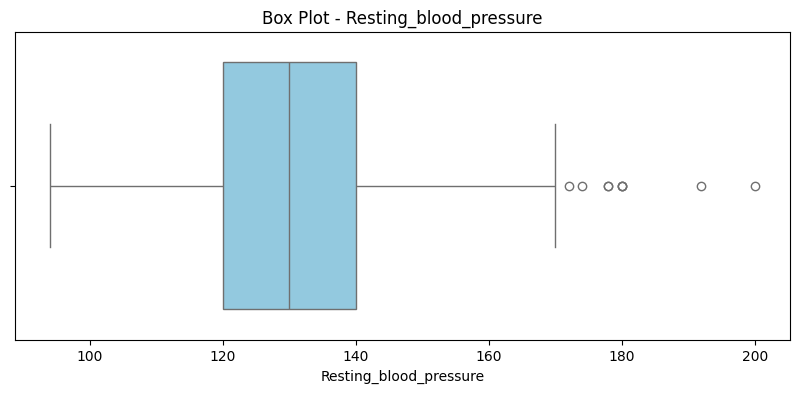

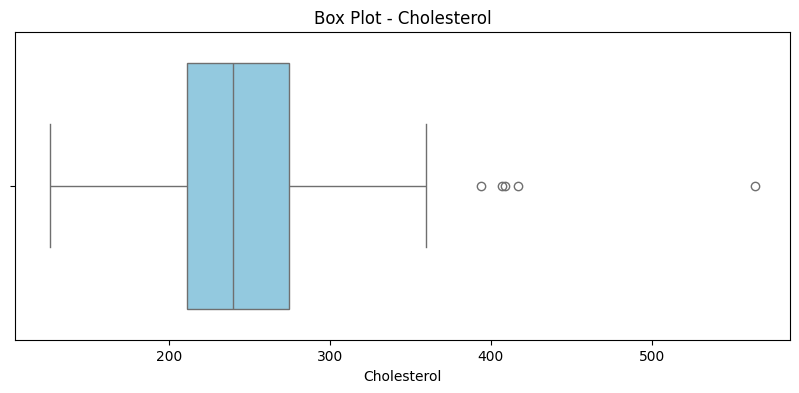

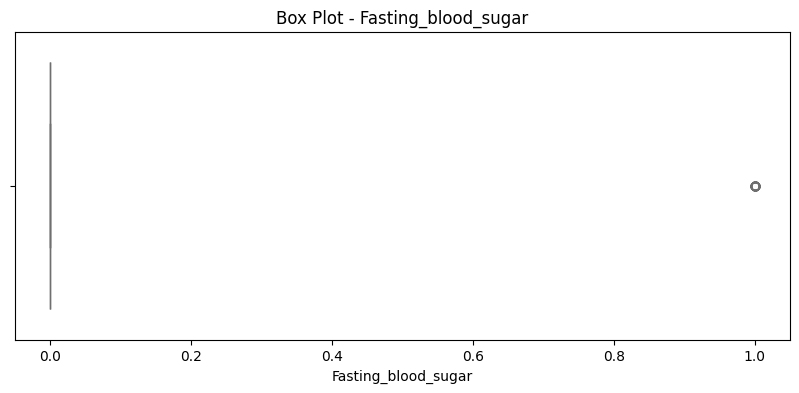

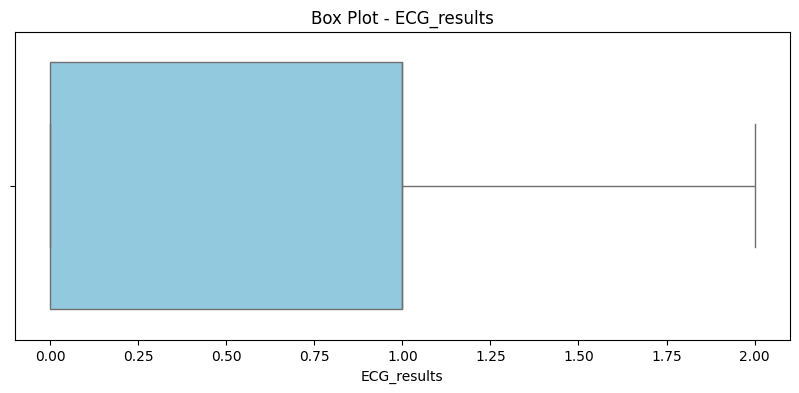

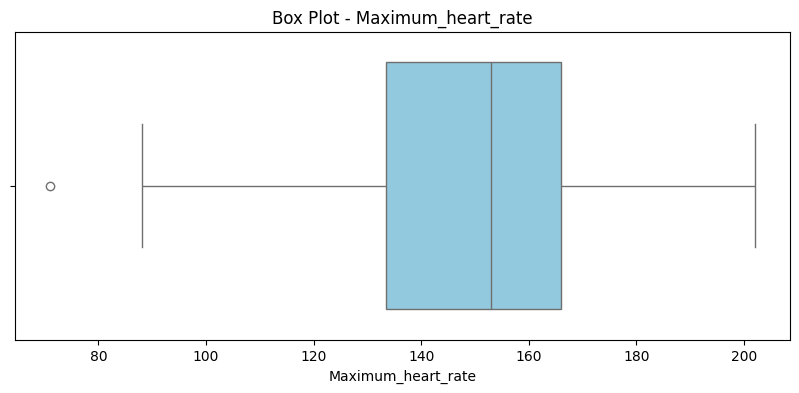

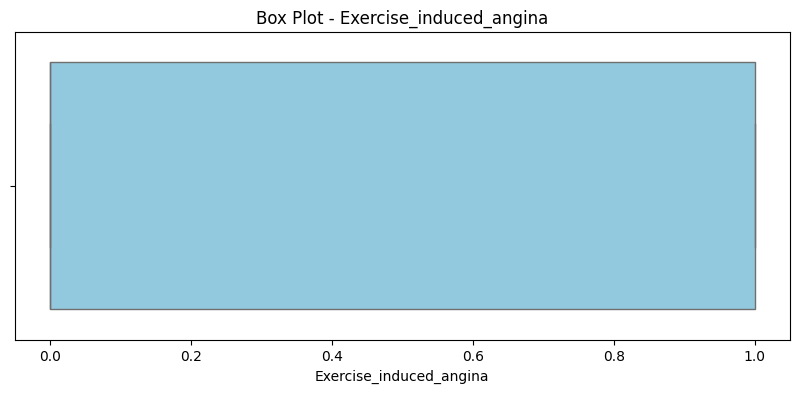

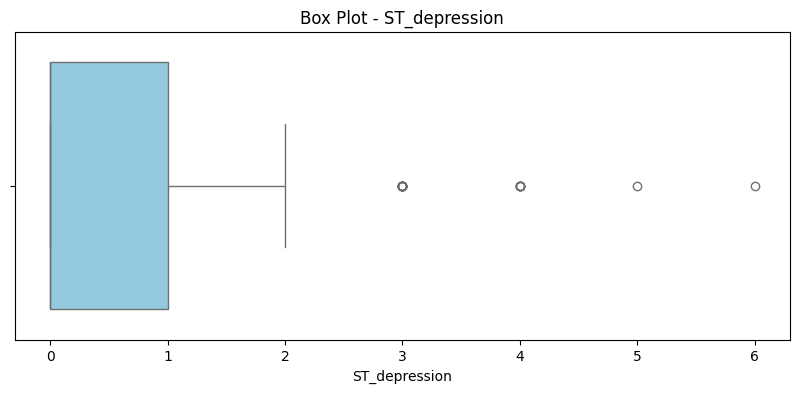

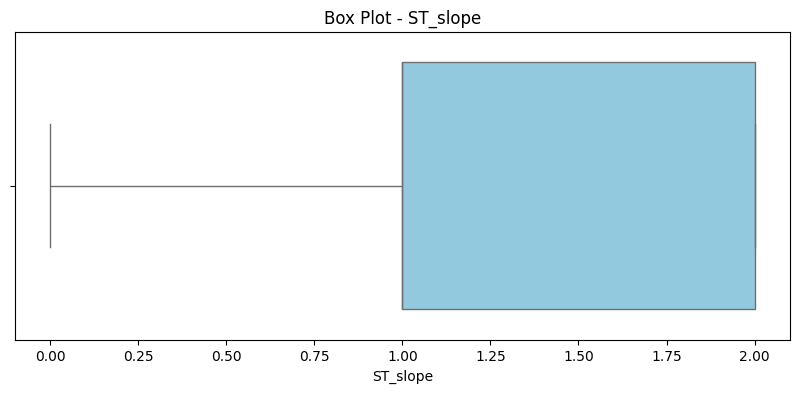

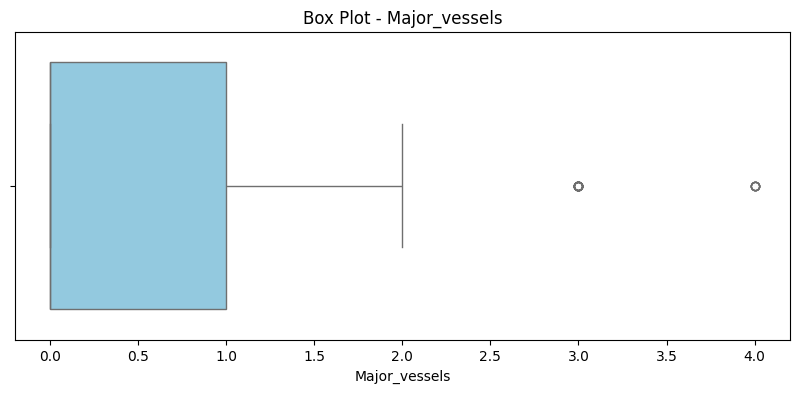

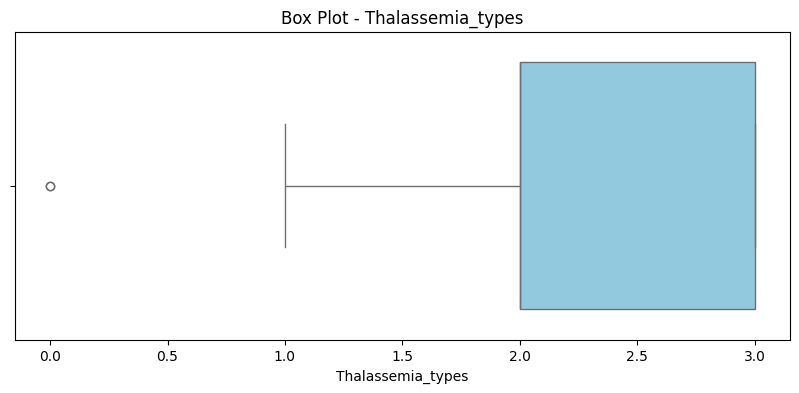

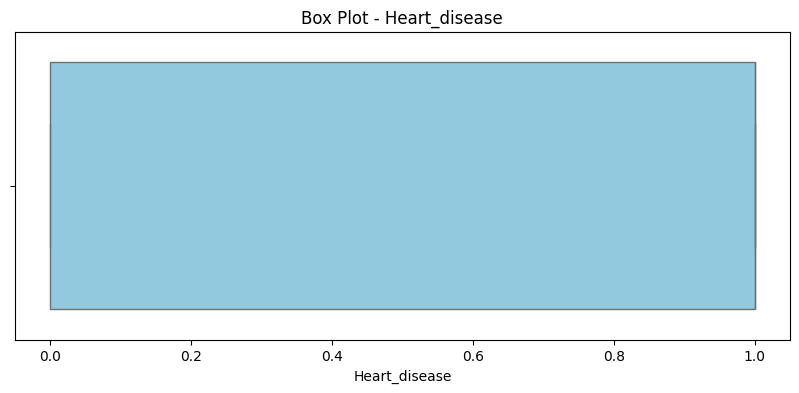

In [ ]:

# Box plots for outliers
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()  # Define numerical_columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Box Plot - {column}")
    plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and test sets
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 78.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:
[[22  6]
 [ 7 26]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 75.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Confusion Matrix:
[[20  8]
 [ 7 26]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Resting_blood_pressure', 'Cholesterol', 'Maximum_heart_rate']
X_scaled = scaler.fit_transform(X[numerical_features])
X[numerical_features] = X_scaled

# Adding interaction terms
X['Age_Cholesterol_Interaction'] = X['Age'] * X['Cholesterol']
X['HeartRate_Age_Ratio'] = X['Maximum_heart_rate'] / X['Age']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best estimator and evaluation
best_rf = grid_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Support Vector Machine
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Evaluate SVM
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.46      0.53        28
           1       0.62      0.76      0.68        33

    accuracy                           0.62        61
   macro avg       0.62      0.61      0.61        61
weighted avg       0.62      0.62      0.61        61



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Multi-Layer Perceptron (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)

# Evaluate MLP
print("MLP Classification Report:\n", classification_report(y_test, mlp_predictions))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        28
           1       0.88      0.64      0.74        33

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61



In [ ]:
from sklearn.metrics import roc_auc_score

# Compare models using ROC-AUC
models = {'Random Forest': best_rf, 'SVM': svm, 'XGBoost': xgb_model, 'MLP': mlp}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} ROC-AUC Score: {auc}")


Random Forest ROC-AUC Score: 0.8777056277056278
SVM ROC-AUC Score: 0.7662337662337662
XGBoost ROC-AUC Score: 0.869047619047619
MLP ROC-AUC Score: 0.8733766233766234


**Hyperparameter Tuning and Evaluation**

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Accuracy: 77.05%
ROC-AUC Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



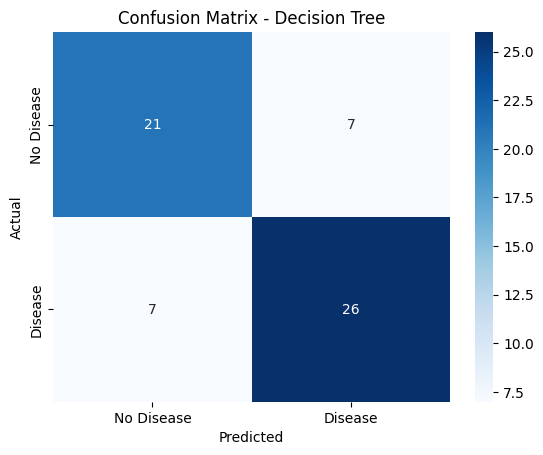

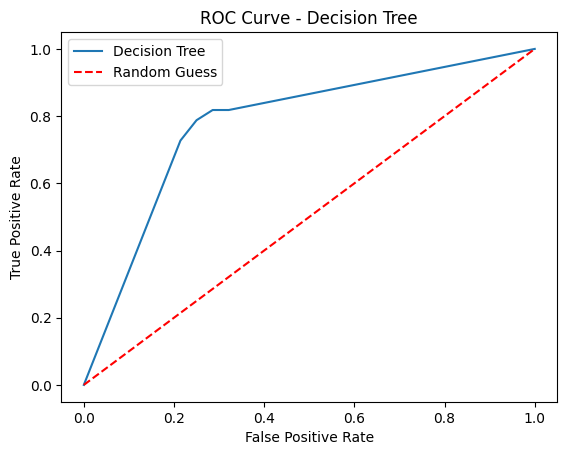

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter Tuning for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(X_train_scaled, y_train)

# Best Model
best_dt = grid_search_dt.best_estimator_

# Predict on Test Data
y_pred_dt = best_dt.predict(X_test_scaled)
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

# Evaluate the Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc_dt:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import shap

# Assume X and y are defined (features and target variable)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers
    'penalty': ['l2']  # Penalty
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Logistic Regression Model with best parameters
logistic_model = LogisticRegression(random_state=42, max_iter=1000, **best_params)
logistic_model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 78.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:
[[21  7]
 [ 6 27]]


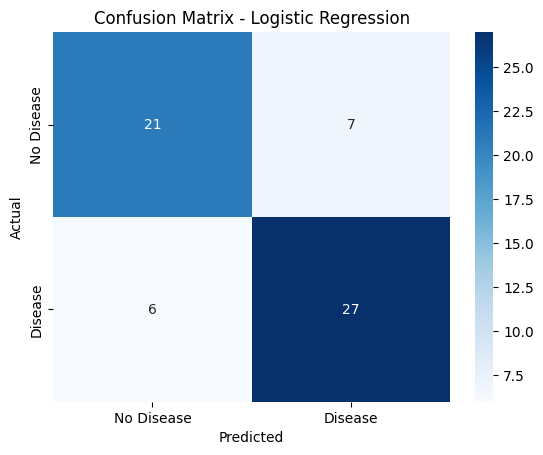

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

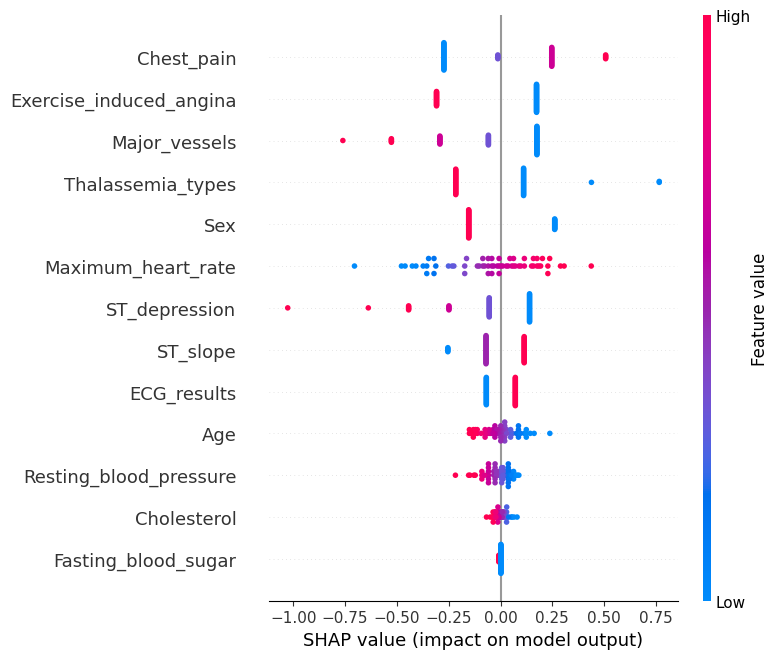

In [ ]:
# SHAP Interpretation
explainer = shap.LinearExplainer(logistic_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



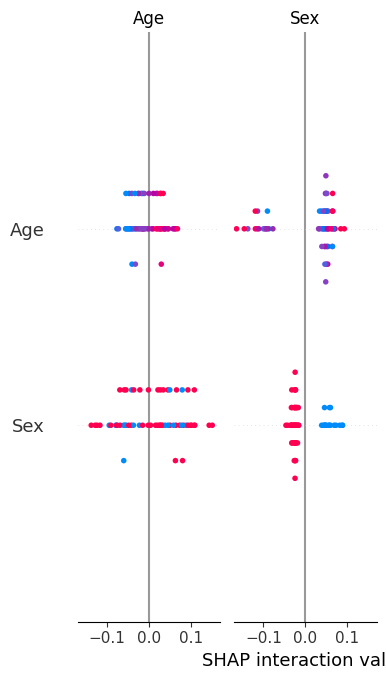

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import shap

# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)

# Extended parameter grid for better tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples required to be at a leaf node
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best estimator and evaluation
best_rf = grid_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# SHAP Interpretation
# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))
for column in X.columns:
  print(column)

Age
Sex
Chest_pain
Resting_blood_pressure
Cholesterol
Fasting_blood_sugar
ECG_results
Maximum_heart_rate
Exercise_induced_angina
ST_depression
ST_slope
Major_vessels
Thalassemia_types
Age_Cholesterol_Interaction
HeartRate_Age_Ratio
